## import and install packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
# from rpy2.robjects.packages import importr

# # do the following _only the first time_, to install the package seqLogo
# base = importr('base')
# # base.source("http://www.bioconductor.org/biocLite.R")
# biocinstaller = importr("BiocManager")
# utils = importr('utils')

# load the installed package "seqLogo"
# seqlogo = importr("seqLogo")

In [9]:
# # install packages
# utils.install_packages('DESeq2')
# utils.install_packages('RColorBrewer')
# utils.install_packages('pheatmap')
# utils.install_packages('tidyverse')

### Setup

In [3]:
pd.set_option('display.max_rows', 500)

### Import data & exploratory data analysis

In [4]:
# read gene counts
df = pd.read_csv('../raw/genes_counts.csv.gz')

In [5]:
df.rename(columns={'Unnamed: 0': 'gene_name'}, inplace=True)
df.set_index('gene_name', inplace=True)

In [13]:
# Look at some observations
df.head()

,A01101401,A01101402,A01101403,A01101404,A01101405,A01101406,A01101407,A01101408,A02271433,A02271434,...,Y11041422,Y11041423,Y11041424,Y11041425,Z11041426,Z11041427,Z11041428,Z11041429,Z11041430,Z11041431
gene_name,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0610007C21Rik,992.00,2287.02,491.78,1932.0,1425.0,130.03,2110.02,955.0,326.0,933.0,...,379.0,397.0,654.0,172.0,0.0,443.0,1457.0,4.0,2.08,2966.0
0610007L01Rik,2.57,177.00,0.00,1.0,2.0,3.00,3040.99,101.0,0.0,1042.0,...,0.0,411.0,471.0,692.0,0.0,0.0,0.0,12.0,115.00,2.0
0610007N19Rik,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0610007P08Rik,0.00,0.00,0.00,0.0,0.0,0.00,17.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1014.00,0.0


In [11]:
# transpose values since each sample is on the Y-axis
data = df.values.T

In [31]:
sns.set(rc={'figure.figsize':(10, 6)})

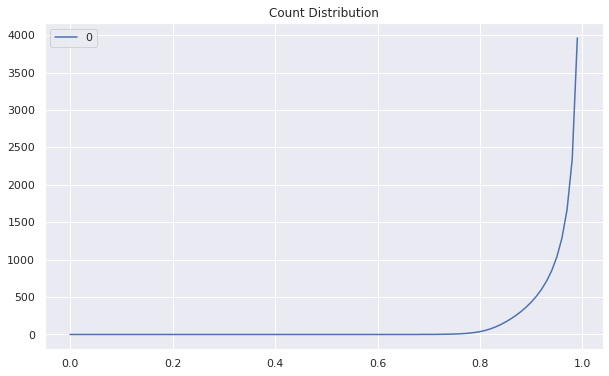

In [32]:
pd.DataFrame(df.values.flatten()).quantile(list(np.arange(0, 1, .01))).plot(title='Count Distribution')

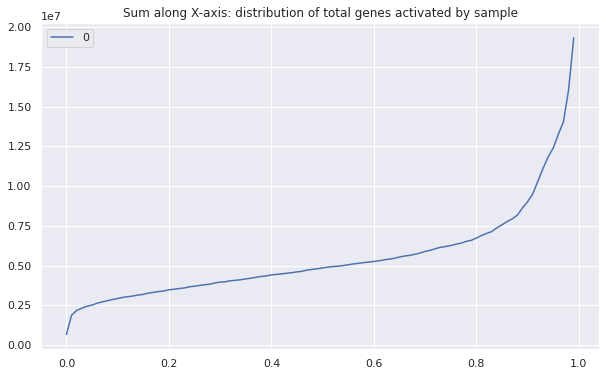

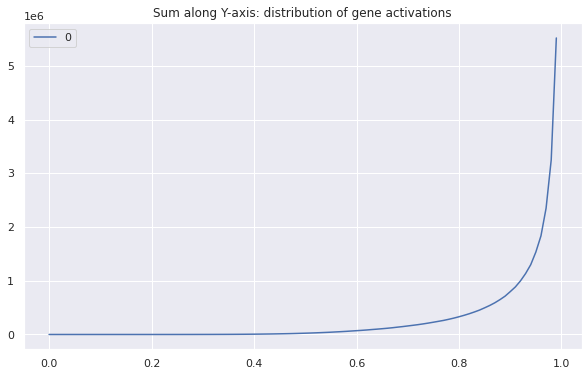

In [34]:
# plot sums along axes
pd.DataFrame(df.sum(axis=0)).quantile(list(np.arange(0, 1, .01))).plot(title='Sum along X-axis: distribution of total genes activated by sample')
pd.DataFrame(df.sum(axis=1)).quantile(list(np.arange(0, 1, .01))).plot(title='Sum along Y-axis: distribution of gene activations')

### PCA + KMeans

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

In [54]:
# set # of PCA components
N_PCA_COMPONENTS = 20

In [190]:
# Look at min/max value for component 1
print(reduced_data[:, 0].min())
print(reduced_data[:, 0].max())

# Look at min/max value for component 2
print(reduced_data[:, 1].min())
print(reduced_data[:, 1].max())

-180752.11681293472
2116349.568285581
-482027.0922770705
542238.556248303


In [191]:
# for user to specify, more points is more memory-intensive
num_points_in_mesh = 500

# perform K-means and visualize
kmeans = KMeans(init='k-means++', n_clusters=N_PCA_COMPONENTS, n_init=10)
kmeans.fit(reduced_data)

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

# point in the mesh [x_min, x_max]x[y_min, y_max].
h = (max(x_max, y_max) - min(x_min, y_min)) / num_points_in_mesh     
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

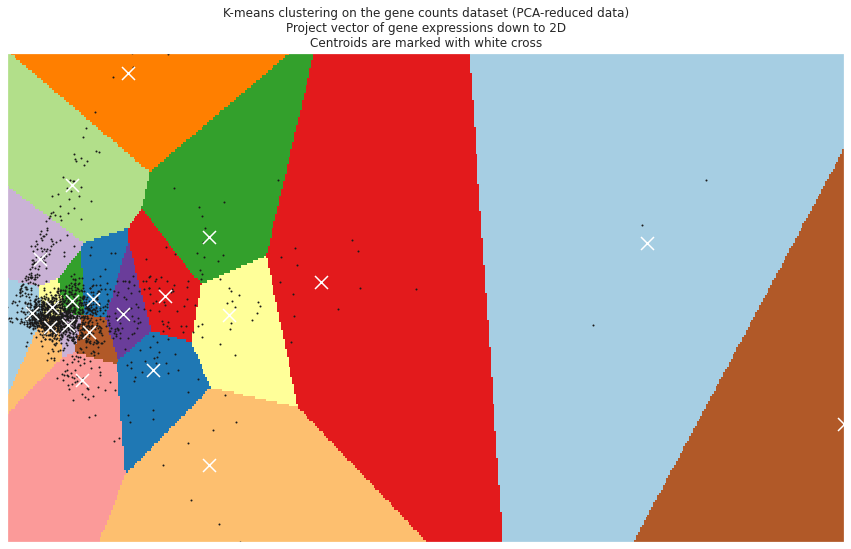

In [192]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the gene counts dataset (PCA-reduced data)\n'
          'Project vector of gene expressions down to 2D\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [193]:
# create dataframe containing sample <-> centroid
df_outcome = pd.DataFrame(zip(list(df.columns), kmeans.labels_), columns=['sample', 'centroid'])
df_outcome

,sample,centroid
0,A01101401,17
1,A01101402,11
2,A01101403,16
3,A01101404,2
4,A01101405,9
...,...,...
1674,Z11041427,11
1675,Z11041428,16
1676,Z11041429,0
1677,Z11041430,16


In [194]:
# observe # of values located in each cluster
df_num_per_centroid = df_outcome.groupby('centroid')['sample'].count()

In [195]:
# see distribution by first letter of sample
df_outcome['sample_start'] = df_outcome['sample'].str[:1]
df_sample_start = df_outcome.groupby(['sample_start', 'centroid']).count().unstack().fillna(0)

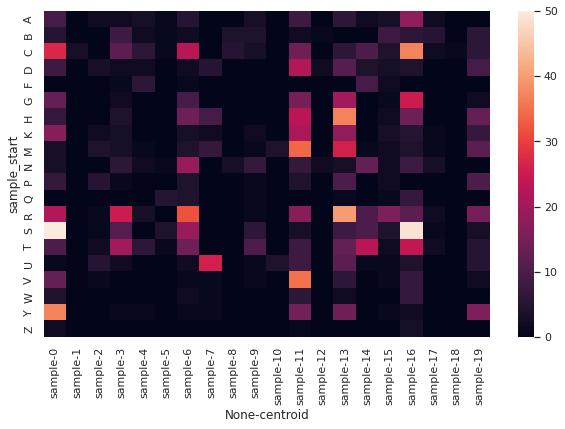

In [198]:
# heat map by centroid - this doesn't look nearly as good as what is in the paper
sns.heatmap(df_sample_start)

In [199]:
# look at samples that are in rarely populated centroids
rare_centroids = list(df_num_per_centroid[df_num_per_centroid.values < 10].index)
df_outcome[df_outcome['centroid'].isin(rare_centroids)].sort_values(by='centroid')

,sample,centroid,sample_start
250,C13090628,1,C
251,C13090629,1,C
252,C13090630,1,C
769,M13120935,10,M
1432,U02271411,10,U
1428,U01101439,10,U
772,M13120938,10,M
770,M13120936,10,M
1437,U02271416,10,U
768,M13120934,10,M


## Let's try a hierarchical clustering approach

In [69]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [78]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix


In [125]:
d = dict()
for i in range(4, 30, 2):
    print(f"Running clusters: {i}...")
    model = AgglomerativeClustering(distance_threshold=None, 
                                    n_clusters=i)

    model.fit(data)
    df_agg_outcome = pd.DataFrame(zip(list(df.columns), model.labels_), columns=['sample', 'label'])
    df_agg_outcome['sample_start'] = df_agg_outcome['sample'].str[:1]

    val = df_agg_outcome.groupby(['sample_start', 'label'])['sample'].count().unstack().fillna(0).mean(axis=1).var()
    d[i] = val

Running clusters: 4...
Running clusters: 6...
Running clusters: 8...
Running clusters: 10...
Running clusters: 12...
Running clusters: 14...
Running clusters: 16...
Running clusters: 18...
Running clusters: 20...
Running clusters: 22...
Running clusters: 24...
Running clusters: 26...
Running clusters: 28...


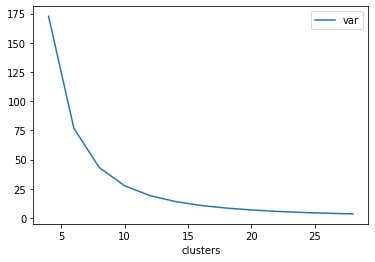

In [142]:
df_cluster_find = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_cluster_find.columns=['clusters', 'var']
df_cluster_find.plot(x='clusters', y='var')

In [153]:
# let's try 20 clusters
model = AgglomerativeClustering(distance_threshold=None, n_clusters=20)
model.fit(data)

AgglomerativeClustering(n_clusters=20)

In [154]:
df_agg_outcome = pd.DataFrame(zip(list(df.columns), model.labels_), columns=['sample', 'label'])
df_agg_outcome['sample_start'] = df_agg_outcome['sample'].str[:1]

In [156]:
df_out = df_agg_outcome.groupby(['sample_start', 'label'])['sample'].count().unstack().fillna(0)

In [178]:
df_out_norm = df_out.div(df_out.sum(axis=0))

In [203]:
df_out_norm

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sample_start,,,,,,,,,,,,,,,,,,,,
A,0.063291,0.000000,0.133333,0.027933,0.0,0.076923,0.000000,0.047619,0.071713,0.00,0.0,0.041899,0.000000,0.00,0.0,0.0,0.008696,0.000000,0.111111,0.00
B,0.101266,0.000000,0.000000,0.041899,0.0,0.000000,0.000000,0.142857,0.000000,0.00,0.0,0.019553,0.000000,0.45,0.0,0.0,0.104348,0.000000,0.000000,0.00
C,0.126582,0.000000,0.000000,0.150838,1.0,0.230769,0.013636,0.190476,0.015936,0.00,0.0,0.142458,0.000000,0.25,1.0,0.0,0.078261,0.181818,0.000000,0.00
D,0.000000,0.029412,0.088889,0.002793,0.0,0.038462,0.077273,0.142857,0.083665,0.20,0.0,0.044693,0.000000,0.00,0.0,1.0,0.000000,0.000000,0.138889,0.50
F,0.012658,0.058824,0.000000,0.002793,0.0,0.096154,0.000000,0.190476,0.000000,0.00,0.0,0.011173,0.000000,0.00,0.0,0.0,0.017391,0.000000,0.000000,0.00
G,0.000000,0.000000,0.022222,0.000000,0.0,0.000000,0.268182,0.000000,0.000000,0.00,0.0,0.075419,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.00
H,0.000000,0.000000,0.066667,0.055866,0.0,0.000000,0.036364,0.000000,0.195219,0.55,0.0,0.022346,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.638889,0.25
K,0.000000,0.000000,0.111111,0.022346,0.0,0.000000,0.081818,0.000000,0.135458,0.00,0.0,0.039106,0.029412,0.00,0.0,0.0,0.026087,0.000000,0.000000,0.25
M,0.000000,0.029412,0.222222,0.005587,0.0,0.019231,0.122727,0.000000,0.219124,0.00,0.2,0.008380,0.176471,0.00,0.0,0.0,0.008696,0.000000,0.000000,0.00


In [217]:
df_out_fin = df_out_norm.copy()
for i, x in enumerate(np.argmax(df_out_norm.values, axis=1)):
    tmp = df_out_fin.iloc[:, i]
    df_out_fin.iloc[:, i] = df_out_fin.iloc[:, x]
    df_out_fin.iloc[:, x] = tmp

In [221]:
df_out_fin

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sample_start,,,,,,,,,,,,,,,,,,,,
A,0.133333,0.00,0.0,0.0,0.047619,0.000000,0.111111,0.00,0.0,0.000000,0.0,0.133333,0.000000,0.00,0.00,0.0,0.000000,0.111111,0.111111,0.0
B,0.000000,0.45,0.0,0.0,0.142857,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.45,0.45,0.0,0.000000,0.000000,0.000000,0.0
C,0.000000,0.25,1.0,0.0,0.190476,0.013636,0.000000,0.00,1.0,0.013636,1.0,0.000000,0.181818,0.25,0.25,1.0,0.013636,0.000000,0.000000,1.0
D,0.088889,0.00,0.0,1.0,0.142857,0.077273,0.138889,0.50,0.0,0.077273,0.0,0.088889,0.000000,0.00,0.00,0.0,0.077273,0.138889,0.138889,0.0
F,0.000000,0.00,0.0,0.0,0.190476,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0
G,0.022222,0.00,0.0,0.0,0.000000,0.268182,0.000000,0.00,0.0,0.268182,0.0,0.022222,0.000000,0.00,0.00,0.0,0.268182,0.000000,0.000000,0.0
H,0.066667,0.00,0.0,0.0,0.000000,0.036364,0.638889,0.25,0.0,0.036364,0.0,0.066667,0.000000,0.00,0.00,0.0,0.036364,0.638889,0.638889,0.0
K,0.111111,0.00,0.0,0.0,0.000000,0.081818,0.000000,0.25,0.0,0.081818,0.0,0.111111,0.000000,0.00,0.00,0.0,0.081818,0.000000,0.000000,0.0
M,0.222222,0.00,0.0,0.0,0.000000,0.122727,0.000000,0.00,0.0,0.122727,0.0,0.222222,0.000000,0.00,0.00,0.0,0.122727,0.000000,0.000000,0.0


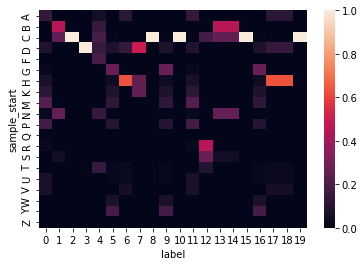

In [220]:
sns.heatmap(df_out_fin)

In [204]:
df_out_norm.iloc[:, list(upd_indices)]

label,11,14,13,0,10,8,2,9,18,5,17,4,19,16,15,1,3,12,6,7
sample_start,,,,,,,,,,,,,,,,,,,,
A,0.041899,0.0,0.00,0.063291,0.0,0.071713,0.133333,0.00,0.111111,0.076923,0.000000,0.0,0.00,0.008696,0.0,0.000000,0.027933,0.000000,0.000000,0.047619
B,0.019553,0.0,0.45,0.101266,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.104348,0.0,0.000000,0.041899,0.000000,0.000000,0.142857
C,0.142458,1.0,0.25,0.126582,0.0,0.015936,0.000000,0.00,0.000000,0.230769,0.181818,1.0,0.00,0.078261,0.0,0.000000,0.150838,0.000000,0.013636,0.190476
D,0.044693,0.0,0.00,0.000000,0.0,0.083665,0.088889,0.20,0.138889,0.038462,0.000000,0.0,0.50,0.000000,1.0,0.029412,0.002793,0.000000,0.077273,0.142857
F,0.011173,0.0,0.00,0.012658,0.0,0.000000,0.000000,0.00,0.000000,0.096154,0.000000,0.0,0.00,0.017391,0.0,0.058824,0.002793,0.000000,0.000000,0.190476
G,0.075419,0.0,0.00,0.000000,0.0,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.268182,0.000000
H,0.022346,0.0,0.00,0.000000,0.0,0.195219,0.066667,0.55,0.638889,0.000000,0.000000,0.0,0.25,0.000000,0.0,0.000000,0.055866,0.000000,0.036364,0.000000
K,0.039106,0.0,0.00,0.000000,0.0,0.135458,0.111111,0.00,0.000000,0.000000,0.000000,0.0,0.25,0.026087,0.0,0.000000,0.022346,0.029412,0.081818,0.000000
M,0.008380,0.0,0.00,0.000000,0.2,0.219124,0.222222,0.00,0.000000,0.019231,0.000000,0.0,0.00,0.008696,0.0,0.029412,0.005587,0.176471,0.122727,0.000000


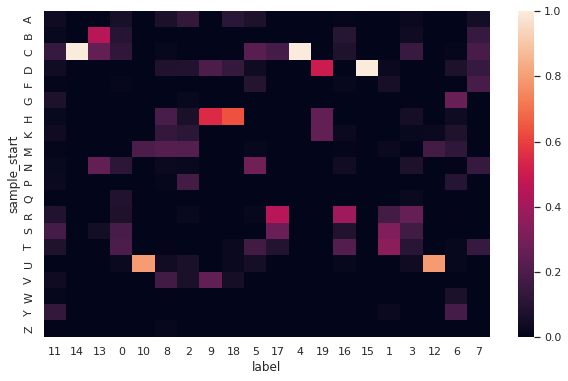

In [222]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(df_out_norm.iloc[:, list(upd_indices)])

## Other

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

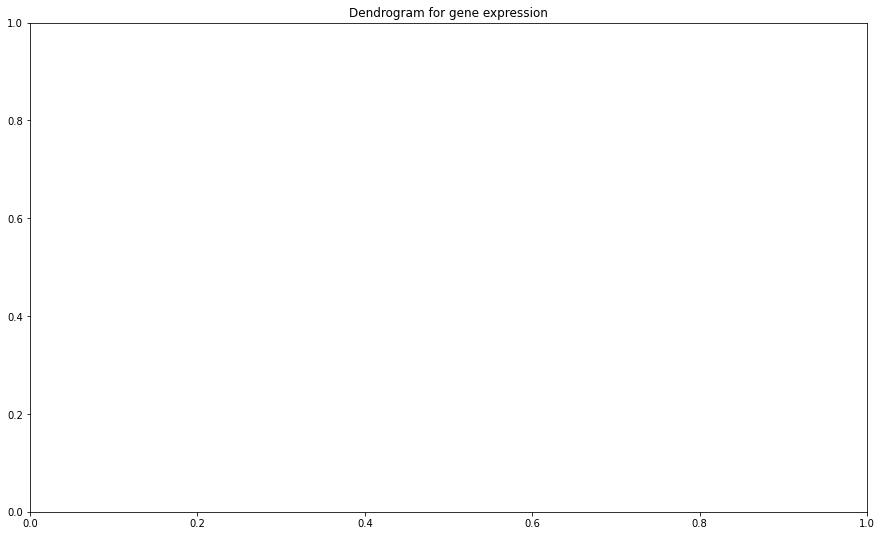

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
plt.title('Dendrogram for gene expression')
# plot the top three levels of the dendrogram
linkage_mat = plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()